In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


## Dados do problema:

In [46]:
pesos_e_valores = [[5, 50], [6, 20], [7, 20], [15, 95], [2, 20], [40, 80], [2, 100], [22, 40], [140, 200], [3, 30]]
peso_maximo = 100

## Criar o Fitness e se foi colocacdo na mochila
Cada indivíduo é uma lista de bits, onde 1 significa que o item foi incluído na mochila, e 0 significa que o item não foi incluído.

In [47]:
import random
from deap import base, creator, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar o valor
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [48]:
def individual_creator(): # Função para criar indivíduos aleatoriamente
    return creator.Individual([random.randint(0, 1) for _ in range(len(pesos_e_valores))])

## Função para avaliar (fitness function)
Calcula o peso total e o valor total do indivíduo (solução). Se o peso total exceder o peso_maximo, o valor de fitness é 0.

In [49]:
def eval_knapsack(individual):
    peso_total = sum(individual[i] * pesos_e_valores[i][0] for i in range(len(individual)))
    valor_total = sum(individual[i] * pesos_e_valores[i][1] for i in range(len(individual)))

    if peso_total > peso_maximo:
        return 0,  # Retorna 0 se exceder o peso máximo
    return valor_total,

def aptidao(individuo):
  f = 0; n = 10
  for i in range(n-1):
    local1 = individuo[i]
    local2 = individuo[i+1]
    f = f + pesos_e_valores[local1][local2]
  return f,

## Criar funções necessárias do algoritmo genético
Criação de indivíduos (individual_creator), cruzamento (cxTwoPoint), mutação (mutFlipBit), e seleção (selTournament).

In [50]:
toolbox = base.Toolbox()
toolbox.register("individual", individual_creator)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_knapsack)
#toolbox.register("evaluate", aptidao)
toolbox.register("mate", tools.cxTwoPoint)  # Crossover com dois pontos
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Mutação de bit flip
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção por torneio

## Definição de quantidade de Gerações e parâmetros de Evolução
O algoritmo genético vai ser executado por X gerações. Cada geração envolve a avaliação da população, seleção, crossover e mutação dos indivíduos. Após cada geração, a população é substituída pelos novos indivíduos (filhos).

In [51]:
n_de_cromossomos = 10
geracoes = 80
probabilidade_crossover = 0.7
probabilidade_mutacao = 0.2

In [52]:
# Criar a população inicial
populacao = toolbox.population(n=n_de_cromossomos)

## Execução

In [53]:
# Executar o algoritmo genético (usando o algoritmo deap.algorithms.eaSimple)
historico_de_fitness = []

for gen in range(geracoes):
    # Avaliar os indivíduos
    fits = list(map(toolbox.evaluate, populacao))

    # Atualizar fitness para cada indivíduo
    for ind, fit in zip(populacao, fits):
        ind.fitness.values = fit

    # Guardar a média de fitness
    media_fitness_atual = sum(fit[0] for fit in fits) / len(fits)
    historico_de_fitness.append(media_fitness_atual)

    # Seleção
    filhos = toolbox.select(populacao, len(populacao))

    # Clonagem dos filhos
    filhos = list(map(toolbox.clone, filhos))

    # Aplicar crossover
    for child1, child2 in zip(filhos[::2], filhos[1::2]):
        if random.random() < probabilidade_crossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Aplicar mutação
    for mutant in filhos:
        if random.random() < probabilidade_mutacao:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Avaliar indivíduos com fitness não calculado
    invalid_ind = [ind for ind in filhos if not ind.fitness.valid]
    fits = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fits):
        ind.fitness.values = fit

    # Substituir a população pela nova geração
    populacao[:] = filhos

## Melhores Soluções (selBest)

In [54]:
best_individuals = tools.selBest(populacao, k=5)
print("\nExemplos de boas soluções:")
for ind in best_individuals:
    print(ind, "Fitness:", ind.fitness.values)


Exemplos de boas soluções:
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: (435.0,)
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: (435.0,)
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: (435.0,)
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: (435.0,)
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: (435.0,)


## Gráfico da Evolução (Valor da Mochila x Gerações)

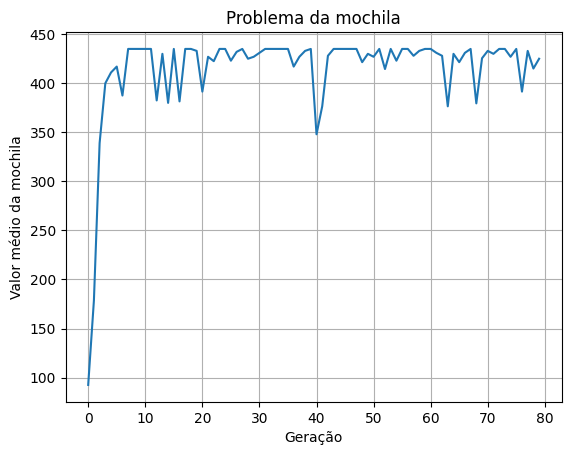

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(geracoes), historico_de_fitness)
plt.grid(True, zorder=0)
plt.title("Problema da mochila")
plt.xlabel("Geração")
plt.ylabel("Valor médio da mochila")
plt.show()

## Obs
Fiz com dois métodos de avaliação, um usando o método de aptidão como em sala e mais usado para problemas de caminhos, e outra função de avaliação que calcula o valor total da mochila que é calculado somando os valores de todos os itens incluídos. Onde o método de aptidão obteve resultados inferiores, visto que não é tão eficiente para esse tipo de método de apoio à decisção